# Regex - ab*c

Here we implement FSM, that matches regular expression `ab*c`, using Python Coroutines

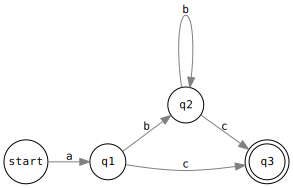

In [1]:
from graphviz import Source
with open("./regex-1.dot", "r") as f:
    gr = Source(f.read())
gr

In [2]:
def prime(fn):
    def wrapper(*args, **kwargs):
        v = fn(*args, **kwargs)
        v.send(None)
        return v
    return wrapper

In [3]:
class RegexFSM:
    def __init__(self):
        self.current_state = None
        
        self.init = self._create_init()
        self.q1 = self._create_q1()
        self.q2 = self._create_q2()
        self.q3 = self._create_q3()
        
        self.current_state = self.init
        self.stopped = False
        
    def send(self, char):
        try:
            self.current_state.send(char)
        except StopIteration:
            self.stopped = True
        
    def does_match(self):
        if self.stopped:
            return False
        return self.current_state == self.q3

    @prime
    def _create_q1(self):
        while True:
            char = yield
            if char == 'b':
                self.current_state = self.q2
            elif char == 'c':
                self.current_state = self.q3
            else:
                break

    @prime
    def _create_q2(self):
        while True:
            char = yield
            if char == 'b':
                self.current_state = self.q2
            elif char == 'c':
                self.current_state = self.q3
            else:
                break

    @prime
    def _create_q3(self):
        while True:
            char = yield
            break

    @prime
    def _create_init(self):
        while True:
            char = yield
            if char == 'a':
                self.current_state = self.q1
            else:
                break

In [4]:
def grep_regex(text):
    evaluator = RegexFSM()
    for ch in text:
        evaluator.send(ch)
    return evaluator.does_match()

In [5]:
grep_regex("a")

False

In [6]:
grep_regex("ab")

False

In [7]:
grep_regex("ac")

True

In [8]:
grep_regex("abc")

True

In [9]:
grep_regex("aba")

False

In [10]:
grep_regex("abbbbbbbc")

True

In [11]:
grep_regex("abcc")

False

In [12]:
grep_regex("abcd")

False

In [13]:
grep_regex("bcbc")

False